## Importando bibliotecas
 Pandas para manipulação de dados e Matplotlib para gerar gráficos que representem os resultados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura do dataset
 Transformando a tabela para o dataframe e guadando na variável df

In [3]:
df = pd.read_csv('../dataset/mobile_device_usage.csv')
df.head()   # método head mostra as 5 primeiras linhas do meu dataset

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


## Entendendo meu dataset
 O DataSet parece estar correto, vou verificar seu tamanho, se há valores faltantes e a distribuição das colunas

In [4]:
df.shape    # Quantidade de linhas x colunas

(700, 11)

In [5]:
df.isna().any() # Checo se existe algum valor nulo

User ID                       False
Device Model                  False
Operating System              False
App Usage Time (min/day)      False
Screen On Time (hours/day)    False
Battery Drain (mAh/day)       False
Number of Apps Installed      False
Data Usage (MB/day)           False
Age                           False
Gender                        False
User Behavior Class           False
dtype: bool

In [6]:
df.info()   # Vendo os tipos de dados das colunas do DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


Análise da distribuição das colunas para verificar se há valores muito discrepantes (possíveis outliers)

In [7]:
df.describe()   # Informações sobre o meu dado agregado (para valores numéricos)

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


## Limpando meu dataset
 Deixando as colunas que são interessantes para a minha análise

 Observo que a primeira coluna "User ID" é redundante, e que a<br>
 coluna "User Behavior Class" não será usada no meu tratamento

 Vou reler o arquivo sem ela

In [8]:
df = df.drop(["User ID", "User Behavior Class"], axis=1)    # Seleciono os títulos das colunas
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [9]:
df.shape

(700, 9)

## Gerando as visualizações

### Distribuição por sistema operacional

In [11]:
# Contar ocorrências de cada sistema operacional
os_counts = df["Operating System"].value_counts()
os_counts

Operating System
Android    554
iOS        146
Name: count, dtype: int64

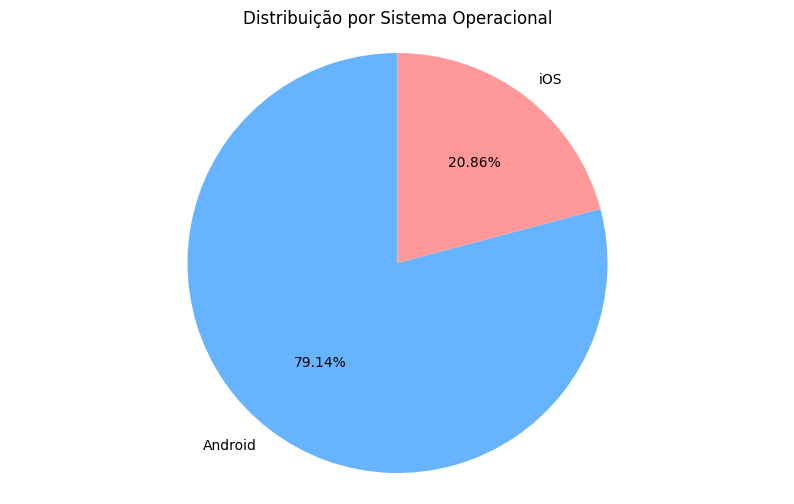

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.pie( # Configura o gráfico de pizza
    os_counts.values,
    labels = os_counts.index,
    autopct = '%1.2f%%',
    startangle = 90,
    colors = ["#66b3ff", "#ff9999","#99ff99", "#ffcc99"]
)
ax.axis('equal')    # Corrige o formato para um círculo
plt.title("Distribuição de usuários por sistema operacional")

plt.show()

### Média de consumo de bateria por dispositivo

In [28]:
# Calcular a média do consumo de bateria por modelo
battery_drain_avg = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().reset_index()
battery_drain_avg

,Device Model,Battery Drain (mAh/day)
0,Google Pixel 5,1475.676056
1,OnePlus 9,1523.849624
2,Samsung Galaxy S21,1504.571429
3,Xiaomi Mi 11,1528.876712
4,iPhone 12,1589.513699


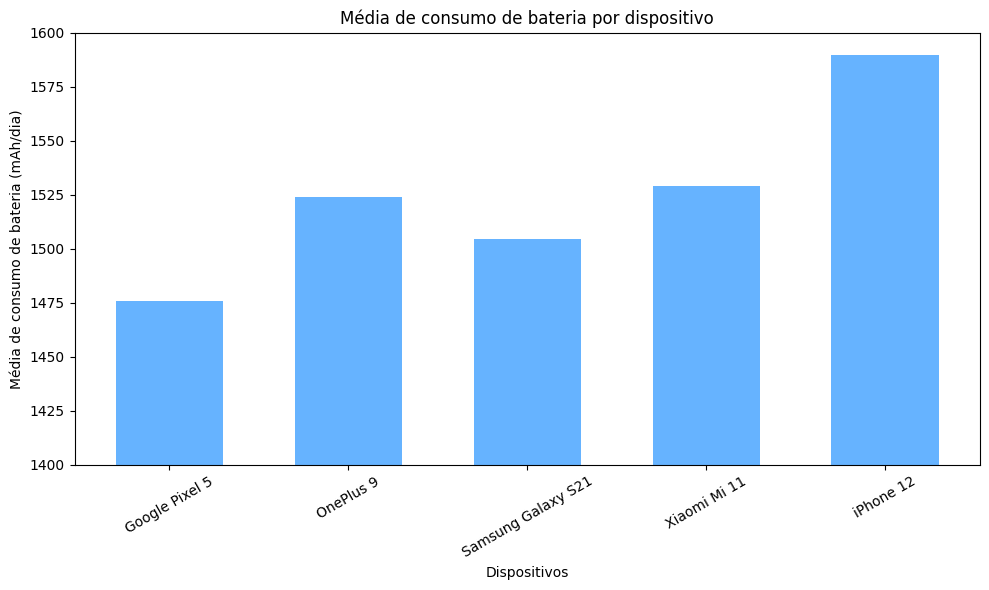

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar( # Configura o grafico de barras
    battery_drain_avg['Device Model'], 
    battery_drain_avg['Battery Drain (mAh/day)'], 
    color='#66b3ff',
    width = 0.6
)

# Personalizar o gráfico
plt.title("Média de consumo de bateria por dispositivo")
plt.xlabel("Dispositivos")
plt.ylabel("Média de consumo de bateria (mAh/dia)")
ax.set_ylim([1400, 1600])   # Ajusta o intervalo do eixo y
plt.xticks(rotation=30) # Rotaciona os rótulos para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposições

plt.show()

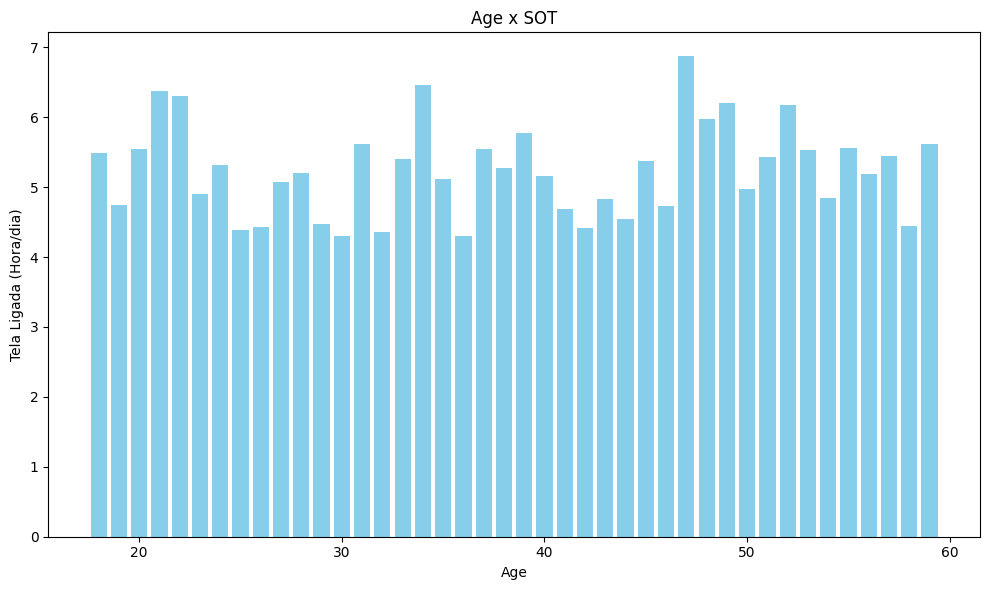

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o CSV
df = pd.read_csv('../dataSheet/mobile_device_usage_dataset.csv')

# Calcular a média de idade de pessoas por tempo de tela
battery_drain_avg = df.groupby('Age')['Screen On Time (hours/day)'].mean().reset_index()

# Criar gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(battery_drain_avg['Age'], battery_drain_avg['Screen On Time (hours/day)'], color='skyblue')

# Personalizar o gráfico
plt.title("Age x SOT")
plt.xlabel("Age")
plt.ylabel("Tela Ligada (Hora/dia)")
plt.tight_layout()  # Ajusta o layout para evitar sobreposições

# Mostrar o gráfico
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o CSV
df = pd.read_csv('../dataSheet/mobile_device_usage_dataset.csv')

# Calcular a média do tempo de tela por gênero
battery_drain_avg = df.groupby('Gender')['Screen On Time (hours/day)'].mean().reset_index()

# Criar gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(battery_drain_avg['Gender'], battery_drain_avg['Screen On Time (hours/day)'], color='skyblue')

# Personalizar o gráfico
plt.title("Gênero x Tempo de Tela")
plt.xlabel("Gênero")
plt.ylabel("Tela Ligada (Hora/dia)")
plt.tight_layout()  # Ajusta o layout para evitar sobreposições

# Mostrar o gráfico
plt.show()

: 

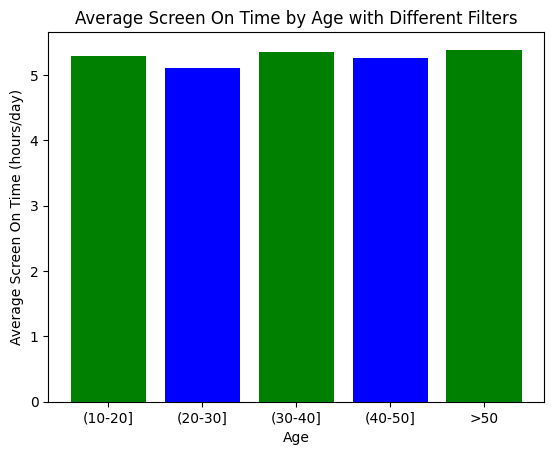

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o CSV
df = pd.read_csv('../dataSheet/mobile_device_usage_dataset.csv')

# Filtro 1: Idade <= 10
df_filtered_1 = df[df['Age'] <= 10]

# Filtro 2: 10 < Idade <= 20
df_filtered_2 = df[(df['Age'] > 10) & (df['Age'] <= 20)]

# Filtro 2: 20 < Idade <= 30
df_filtered_3 = df[(df['Age'] > 20) & (df['Age'] <= 30)]

# Filtro 2: 30 < Idade <= 40
df_filtered_4 = df[(df['Age'] > 30) & (df['Age'] <= 40)]

# Filtro 2: 40 < Idade <= 50
df_filtered_5 = df[(df['Age'] > 40) & (df['Age'] <= 50)]

# Filtro 2: 50+
df_filtered_6 = df[(df['Age'] > 50) ]

# Calcular a média por 'Age' para cada filtro
mean_filtered_1 = df_filtered_1['Screen On Time (hours/day)'].mean()
mean_filtered_2 = df_filtered_2['Screen On Time (hours/day)'].mean()
mean_filtered_3 = df_filtered_3['Screen On Time (hours/day)'].mean()
mean_filtered_4 = df_filtered_4['Screen On Time (hours/day)'].mean()
mean_filtered_5 = df_filtered_5['Screen On Time (hours/day)'].mean()
mean_filtered_6 = df_filtered_6['Screen On Time (hours/day)'].mean()


# Definir as faixas de idade e as médias para o gráfico
x = ['[0-10]', '(10-20]','(20-30]','(30-40]','(40-50]','>50']
y = [mean_filtered_1, mean_filtered_2, mean_filtered_3, mean_filtered_4, mean_filtered_5 , mean_filtered_6]

# Criar o gráfico de barras
plt.bar(x, y, color=['blue', 'green'])

# Adicionando título e legendas
plt.title('Average Screen On Time by Age with Different Filters')
plt.xlabel('Age')
plt.ylabel('Average Screen On Time (hours/day)')

# Exibir o gráfico
plt.show()


